<a href="https://colab.research.google.com/github/samuelsushanth/machinelearninganddataanalysisprojects/blob/main/Image_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-dotenv

In [ ]:
# importing libraries
import openai
from dotenv import load_dotenv
import os
import io
import requests
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Load environment variables from the .env file
load_dotenv()

True

In [ ]:
openai.api_key  = os.getenv("API_KEY")

### Image creation

In [ ]:
PROMPT = "An eco-friendly computer from the 90s in the style of vaporwave"

response = openai.images.generate(
    model="dall-e-3",
    prompt=PROMPT,
    quality='standard',
    n=1,
    #size="256x256",
    #response_format="b64_json",
)

In [ ]:
image = requests.get(response.data[0].url)

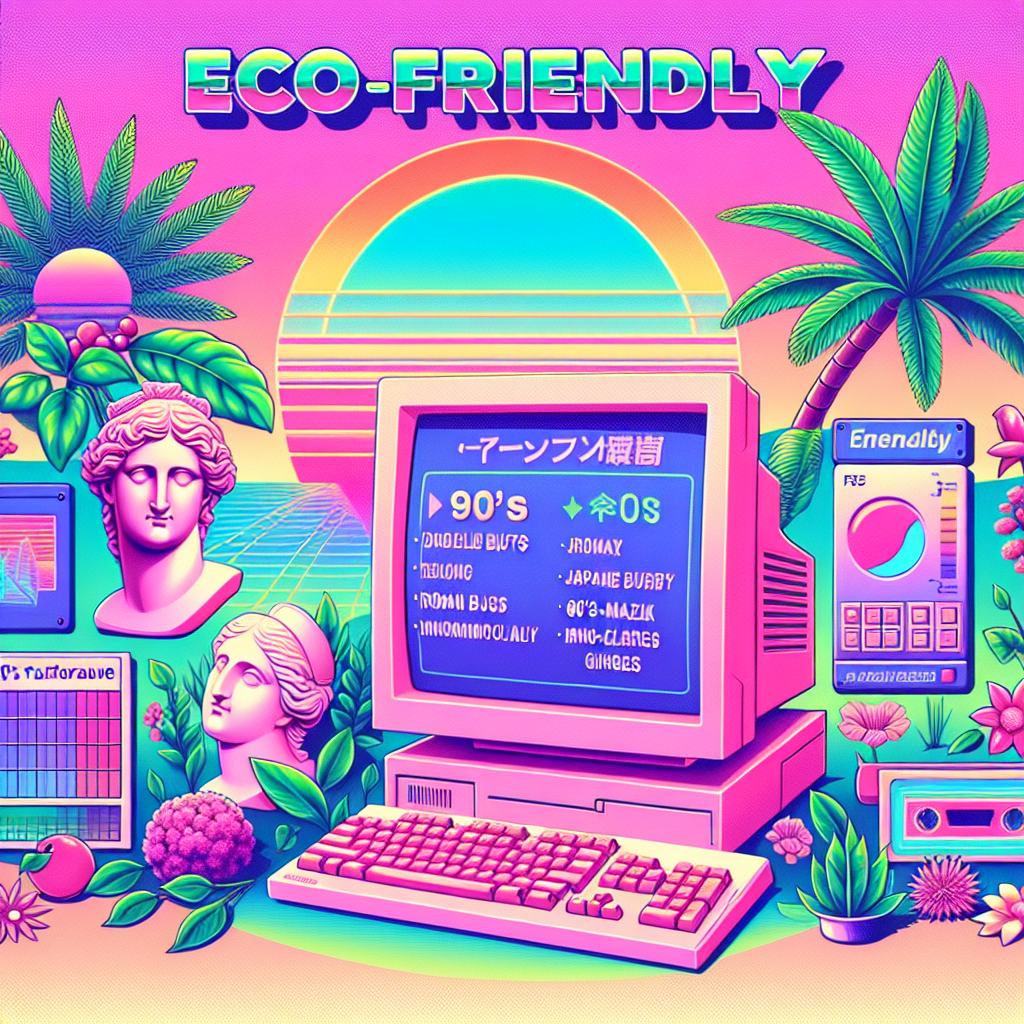

In [ ]:
Image.open(io.BytesIO(image.content))

### Edit image

image masking
https://labs.openai.com/editor

In [ ]:
response = openai.images.edit(
  model="dall-e-2",
  image=open("cat and dog playing together.png", "rb"),
  mask=open("mask.png", "rb"),
  prompt="Given an image of a playful cat and dog, with the cat partially masked, replace the masked area with an image of a horse.",
  n=1,
  size="512x512"
)
image_url = response.data[0].url

OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

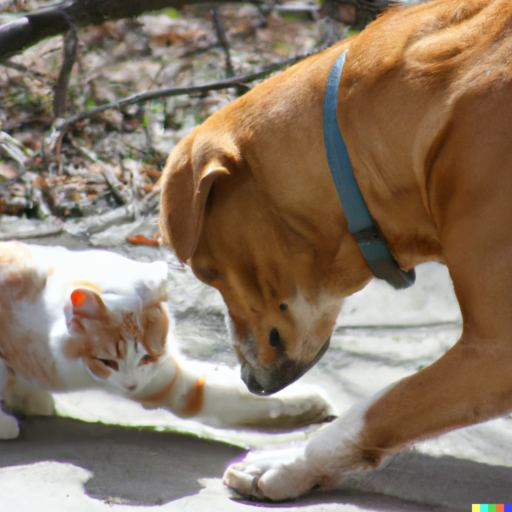

In [ ]:
response = requests.get(image_url)
Image.open(io.BytesIO(response.content))

In [ ]:
response = openai.images.edit(
  model="dall-e-2",
  image=open("cat and dog playing together.png", "rb"),
  mask=open("mask.png", "rb"),
  prompt="replace the masked area with an image of a horse.",
  n=1,
  size="512x512"
)
image_url = response.data[0].url

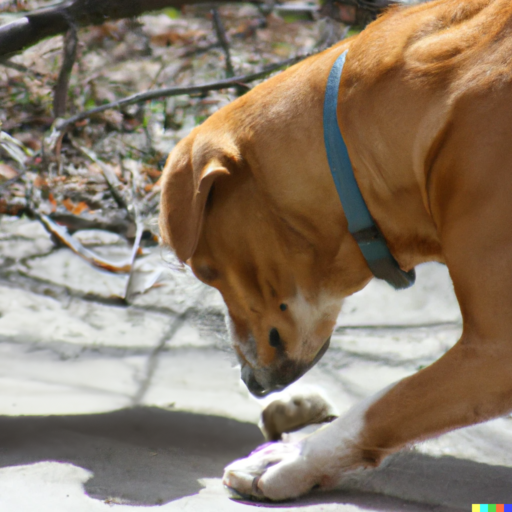

In [ ]:
response = requests.get(image_url)
Image.open(io.BytesIO(response.content))

### Variations

In [ ]:
response = openai.images.create_variation(
  image=open("cat and dog playing together.png", "rb"),
  n=2,
  size="256x256"
)
image_url = response.data[0].url

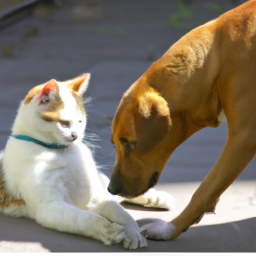

In [ ]:
response = requests.get(image_url)
Image.open(io.BytesIO(response.content))

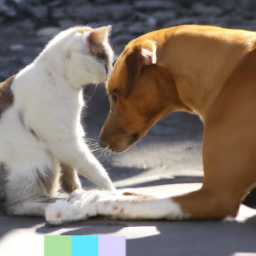

In [ ]:
response = openai.images.create_variation(
  image=open("cat and dog playing together.png", "rb"),
  n=1,
  size="256x256"
)
image_url = response.data[0].url
response = requests.get(image_url)
Image.open(io.BytesIO(response.content))

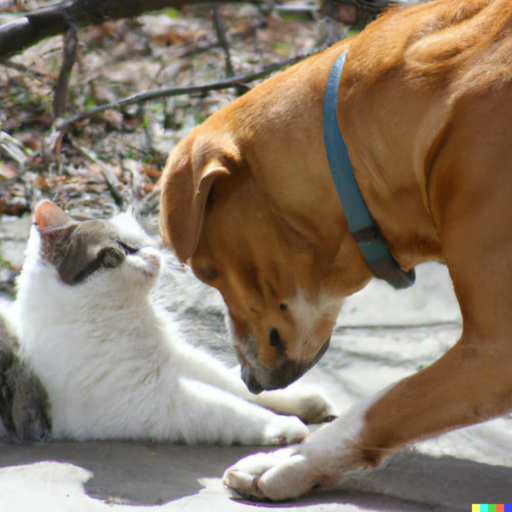

In [ ]:
response = openai.images.edit(
  model="dall-e-2",
  image=open("cat and dog playing together.png", "rb"),
#   mask=open("mask.png", "rb"),
  prompt="change the position of cat and dog",
  n=1,
  size="512x512"
)
image_url = response.data[0].url
response = requests.get(image_url)
Image.open(io.BytesIO(response.content))